In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

# CHECKING THE BASIC DETAILS OF THE DATASET

In [3]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
data_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
data_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [7]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
data_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# Exploratory Data Analysis

In [9]:
from  pandas_profiling import ProfileReport
profile=ProfileReport(data_train, title= "pandas profile report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Pre-processing

# CHECKING THE NULL VALUES IN THE DATASET

In [10]:
data_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### The Training data set contains 1463 null values in Item Weight and 2410 null values in Outlet size column The Testing data set contains 976 null values in Item Weight and 1606 null values in Outlet size column

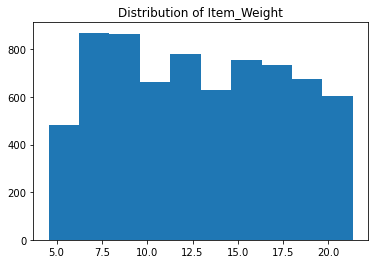

In [12]:
plt.hist(data_train['Item_Weight'])
plt.title('Distribution of Item_Weight')
plt.show()

### From the distribution it is understood that Data in age column is uniformly distributed. So we use mean to fill the null values

In [13]:
data_train['Item_Weight'] = data_train['Item_Weight'].fillna(data_train['Item_Weight'].mean())
data_train.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
data_test['Item_Weight'] = data_test['Item_Weight'].fillna(data_test['Item_Weight'].mean())
data_test.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### The Outlet_Size column need to be filled. The Outlet_Size Column is a categorical one so we use mode for filling column

In [15]:
data_train['Outlet_Size'].fillna(data_train['Outlet_Size'].mode()[0], inplace=True)
data_train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [16]:
data_test['Outlet_Size'].fillna(data_test['Outlet_Size'].mode()[0], inplace=True)
data_test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [17]:
data_train['Item_Identifier'].nunique()

1559

In [18]:
data_train['Outlet_Identifier'].nunique()

10

In [19]:
data_test['Item_Identifier'].nunique()

1543

In [20]:
data_test['Outlet_Identifier'].nunique()

10

## These columns contains lot of unique values so we drop it

In [21]:
data_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
data_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

## Checking Outliers in numerical columns

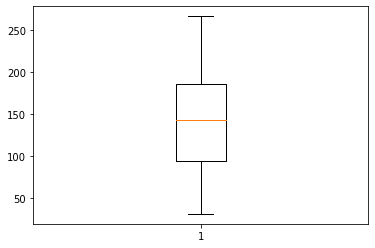

In [22]:
plt.boxplot(data_train['Item_MRP'])
plt.show()

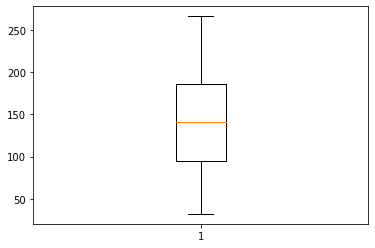

In [23]:
plt.boxplot(data_test['Item_MRP'])
plt.show()

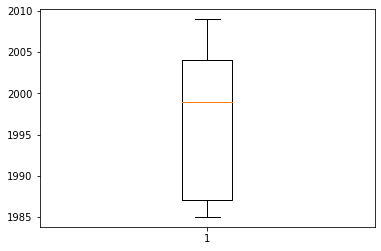

In [24]:
plt.boxplot(data_train['Outlet_Establishment_Year'])
plt.show()

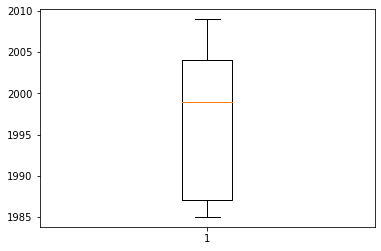

In [25]:
plt.boxplot(data_test['Outlet_Establishment_Year'])
plt.show()

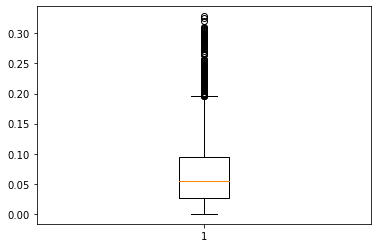

In [26]:
plt.boxplot(data_train['Item_Visibility'])
plt.show()

In [27]:
Q1=np.percentile(data_train['Item_Visibility'],25,interpolation='midpoint')
Q2=np.percentile(data_train['Item_Visibility'],50,interpolation='midpoint')
Q3=np.percentile(data_train['Item_Visibility'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

0.0269894775 0.053930934 0.0945852925


In [28]:
iqr=Q3-Q1
iqr
low_limit=Q1-1.5*iqr
up_limit=Q3+1.5*iqr
print(low_limit,up_limit)

-0.07440424500000001 0.195979015


In [29]:
outliers1=[]
for i in data_train['Item_Visibility']:
    if(i>up_limit) or (i<low_limit):
        outliers1.append(i)

In [30]:
#  Replacing the outliers by the maximum and minimum limit

data_train['Item_Visibility']= np.where(data_train['Item_Visibility'] > up_limit, up_limit,
                       np.where(data_train['Item_Visibility'] <low_limit,low_limit, data_train['Item_Visibility']))

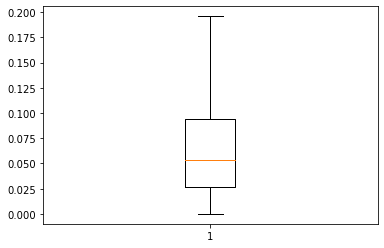

In [31]:
plt.boxplot(data_train['Item_Visibility'])
plt.show()

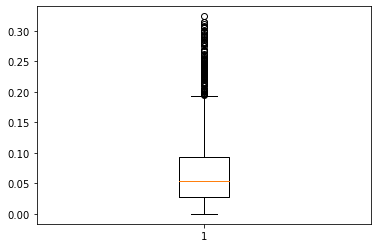

In [32]:
plt.boxplot(data_test['Item_Visibility'])

plt.show()

In [33]:
Q1=np.percentile(data_test['Item_Visibility'],25,interpolation='midpoint')
Q2=np.percentile(data_test['Item_Visibility'],50,interpolation='midpoint')
Q3=np.percentile(data_test['Item_Visibility'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

0.027046875 0.054154252 0.093462623


In [34]:
iqr=Q3-Q1
iqr
low_limit=Q1-1.5*iqr
up_limit=Q3+1.5*iqr
print(low_limit,up_limit)

-0.072576747 0.193086245


In [35]:
outliers1=[]
for i in data_test['Item_Visibility']:
    if(i>up_limit) or (i<low_limit):
        outliers1.append(i)

In [36]:
data_test['Item_Visibility']= np.where(data_test['Item_Visibility'] > up_limit, up_limit,
                       np.where(data_test['Item_Visibility'] <low_limit,low_limit, data_test['Item_Visibility']))

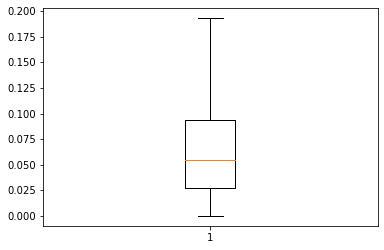

In [37]:
plt.boxplot(data_test['Item_Visibility'])

plt.show()

## All the ouliers are handled by adjusting the upper and lower boundaries of data set

## Label Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le=LabelEncoder()
data_train=data_train.apply(le.fit_transform)
data_test=data_test.apply(le.fit_transform)

In [42]:
data_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,284,1,664,4,5592,4,1,0,1,2540
1,57,2,880,14,473,8,1,2,2,422
2,376,1,715,10,2901,4,1,0,1,1639
3,393,2,0,6,4227,3,1,2,0,670
4,265,1,0,9,627,1,0,2,1,865
...,...,...,...,...,...,...,...,...,...,...
8518,125,1,3912,13,4955,1,0,2,1,2047
8519,233,2,3278,0,2023,5,1,1,1,516
8520,299,1,2302,8,1263,6,2,1,1,1018
8521,149,2,7175,13,1857,8,1,2,2,1466


In [43]:
data_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,404,1,66,13,1460,4,1,0,1
1,223,4,1714,4,965,7,1,1,1
2,338,1,4042,11,4076,3,1,2,0
3,156,1,388,13,2522,7,1,1,1
4,319,2,4423,4,3972,0,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,293,2,290,13,2164,2,2,0,1
5677,178,2,4815,15,2833,8,1,2,2
5678,288,1,3256,8,1752,5,1,1,1
5679,349,2,0,3,3691,7,1,1,1


## Splitting the Training datset into target and features

In [44]:
X=data_train.drop('Item_Outlet_Sales',axis=1)
y=data_train['Item_Outlet_Sales']

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [48]:
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [49]:
X_train_std

array([[ 0.28272304,  0.98363228,  1.68261435, ...,  1.37818311,
        -1.35762955, -1.52069189],
       [ 0.34602388, -0.570215  ,  0.04214876, ..., -0.28167424,
        -1.35762955, -0.25320078],
       [ 0.05061994,  0.98363228, -1.47437425, ..., -1.94153159,
         1.09958262, -0.25320078],
       ...,
       [-2.55526483,  0.98363228, -1.18100174, ..., -1.94153159,
         1.09958262, -0.25320078],
       [ 0.6097774 , -0.570215  , -1.54573513, ..., -0.28167424,
         1.09958262,  1.01429034],
       [ 0.3249236 ,  4.09132685,  0.42566132, ..., -0.28167424,
         1.09958262,  1.01429034]])

# MODEL BUILDING

## MODEL 1-Linear Regression 

In [50]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [51]:
model1=lr.fit(X_train_std,y_train)

In [52]:
ypred_lr=model1.predict(X_test_std)

In [53]:
ypred_lr

array([ 456.72117716, 1081.5003965 , 2282.47803168, ...,  966.23374395,
       2362.57424461, 1788.33034386])

In [54]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [55]:
r2_score(y_test,ypred_lr)

0.5709015324626758

In [56]:
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,ypred_lr)))

RMSE value is: 604.420043740369


## MODEL 2- Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model2=rf.fit(X_train_std,y_train)

In [58]:
ypred_rf=model2.predict(X_test_std)

In [59]:
ypred_rf

array([ 645.85,  296.94, 2125.66, ...,  502.47, 2579.  , 1711.05])

In [60]:
r2_score(y_test,ypred_rf)

0.620768176158849

In [61]:
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,ypred_rf)))

RMSE value is: 568.215090676336


## MODEL 3-Lasso Regression

In [62]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1.0)
model3=lasso.fit(X_train_std,y_train)
ypred_lasso=model3.predict(X_test_std)

In [63]:
r2_score(y_test,ypred_lasso)

0.5707977488401514

In [64]:
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,ypred_lasso)))

RMSE value is: 604.4931331521224


In [66]:
ypred_lasso2=model3.predict(data_test)

In [67]:
ypred_lasso2

array([ 769268.88416845,  450638.00371559, 2017653.64056825, ...,
        812924.73870067, 1957067.4620959 ,  278569.71639345])

## MODEL 4-Ridge Regression

In [68]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
 
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 5}
-379205.412637743


In [70]:
ridge=Ridge(alpha=5)
model4=ridge.fit(X_train_std,y_train)
ypred_ridge=model4.predict(X_test_std)

In [71]:
r2_score(y_test,ypred_ridge)

0.5708825613484937

In [72]:
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,ypred_ridge)))

RMSE value is: 604.433404770291


# FINE TUNING OF MODELS

## Cross validation

In [74]:
from sklearn.model_selection import cross_validate

In [75]:
cvs_lr=cross_validate(lr,X,y,cv=10)
print('The cv score for Linear regression model:',cvs_lr['test_score'].mean())

The cv score for Linear regression model: 0.5496863240129726


In [77]:
cvs_rf=cross_validate(rf,X,y,cv=10)
print('The cv score for Random Forest regression model:',cvs_rf['test_score'].mean())

The cv score for Random Forest regression model: 0.6176099113581123


In [78]:
cvs_lasso=cross_validate(lasso,X,y,cv=10)
print('The cv score for Lasso regression model:',cvs_lasso['test_score'].mean())

The cv score for Lasso regression model: 0.5496717592617874


In [79]:
cvs_ridge=cross_validate(ridge,X,y,cv=10)
print('The cv score for Ridge regression model:',cvs_lasso['test_score'].mean())

The cv score for Ridge regression model: 0.5496717592617874


## Best model is random forest model ( model 2)

## Predicting the values of Best Model

In [80]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model_rf2=rf.fit(X_train,y_train)

In [81]:
ypred_rf2=rf.predict(data_test)
ypred_rf2

array([1195.73,  984.54,  298.22, ..., 1399.94, 1812.63,  776.23])

In [82]:
ypred_rf2

array([1195.73,  984.54,  298.22, ..., 1399.94, 1812.63,  776.23])

## Creating Solution Data set

In [87]:
data_sam=pd.read_csv('sample_submission.csv')
data_sam

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [88]:
data_sam=data_sub.drop('Item_Outlet_Sales',axis=1)
data_sam

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027
...,...,...
5676,FDB58,OUT046
5677,FDD47,OUT018
5678,NCO17,OUT045
5679,FDJ26,OUT017


In [89]:
ypred_rf2=pd.DataFrame(ypred_rf2,columns=['Item_Outlet_Sales'])
ypred_rf2

,Item_Outlet_Sales
0,1195.73
1,984.54
2,298.22
3,1487.05
4,2607.53
...,...
5676,1330.35
5677,1465.35
5678,1399.94
5679,1812.63


In [90]:
data_sam=pd.concat([data_sam,ypred_rf2],axis=1)
data_sam

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1195.73
1,FDW14,OUT017,984.54
2,NCN55,OUT010,298.22
3,FDQ58,OUT017,1487.05
4,FDY38,OUT027,2607.53
...,...,...,...
5676,FDB58,OUT046,1330.35
5677,FDD47,OUT018,1465.35
5678,NCO17,OUT045,1399.94
5679,FDJ26,OUT017,1812.63


In [91]:
data_sam.set_index('Item_Identifier', inplace=True)
data_sam

,Outlet_Identifier,Item_Outlet_Sales
Item_Identifier,,
FDW58,OUT049,1195.73
FDW14,OUT017,984.54
NCN55,OUT010,298.22
FDQ58,OUT017,1487.05
FDY38,OUT027,2607.53
...,...,...
FDB58,OUT046,1330.35
FDD47,OUT018,1465.35
NCO17,OUT045,1399.94


In [94]:
# saving the dataframe 
data_sam.to_csv('Solution.csv')

***
***